# Losgistic Regression

Here is to practice the example from the sklearn.  
Use the iris dataset to practice training logistic regression model and plot the decision boundry.

### Import Library and Setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
sns.set(style="white", color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets, linear_model

### Import Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
# Use two parameter to run the regression and visualization the decision boundry
df = pd.DataFrame(iris.data[:, :2], columns=['sepal_length', 'sepal_width'])
s = pd.Series(iris.target)

### Learning Model

In [6]:
# Loading the model
logit = linear_model.LogisticRegression()

### Training the model

In [7]:
logit.fit(df, s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
#Set up the range to decision boundry
x_min, x_max = df.iloc[:, 0].min()-0.5, df.iloc[:, 0].max()+0.5
y_min, y_max = df.iloc[:, 1].min()-0.5, df.iloc[:, 1].max()+0.5

In [9]:
#Make the decision boundry data points
h = 0.01

#Use the meshgrid to make matrix grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.meshgrid(np.arange(y_min, y_max, h)))

#Use the ravel() to transfer to 1D array
#Use np.c to stack to 2D array
z = logit.predict(np.c_[xx.ravel(), yy.ravel()])

In [10]:
z = z.reshape(xx.shape)

(1.5, 4.900000000000003)

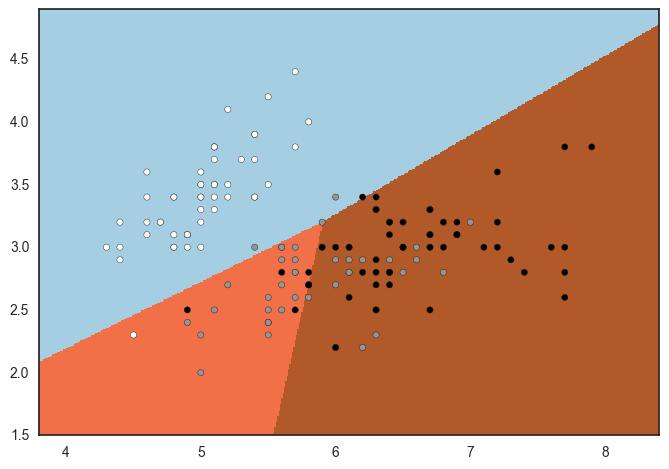

In [11]:
plt.figure(1)

#Use the pcolormesh to plot the 2D array
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=s)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())